# Задание:
### Создать питоновский скрипт, который обрабатывает директорию файлов и ищет нужный нам размер , и все разделяет по расширению. Создать условие, если картинка то мы используем матрицу смежности, если звук, то делаем ффт и выводим ачх спектр

Выполняется импорт необходимых библиотек и модулей для кода. Сюда входят os для взаимодействия с операционной системой, fnmatch для сопоставления шаблонов с именами файлов, librosa для обработки аудио, numpy для числовых операций, matplotlib.pyplot для построения графиков, PIL.Image для работы с изображениями, networkx для операций с графами, scipy.sparse.lil_matrix для создания разреженной матрицы и tqdm для отображения панелей прогресса.

In [1]:
import os
import fnmatch
import librosa
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import networkx as nx
from scipy.sparse import lil_matrix
from tqdm import tqdm

Processing files: 0it [00:00, ?it/s]

Обработка изображений: C:\Users\Nekon\Pictures\MSI Wallpaper\closeup-shot-of-a-disabled-white-cat-on-white.jpg


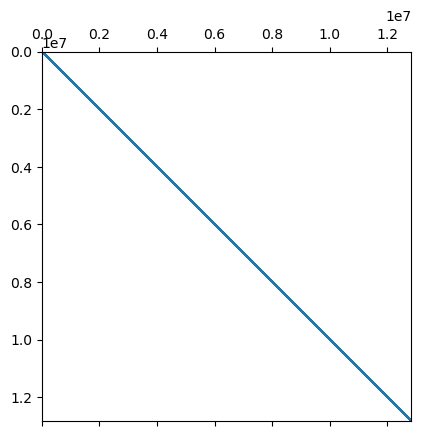

Обработка аудио: C:\Users\Nekon\Pictures\MSI Wallpaper\hammali-navai_-_a-esli-eto-lyubov.mp3


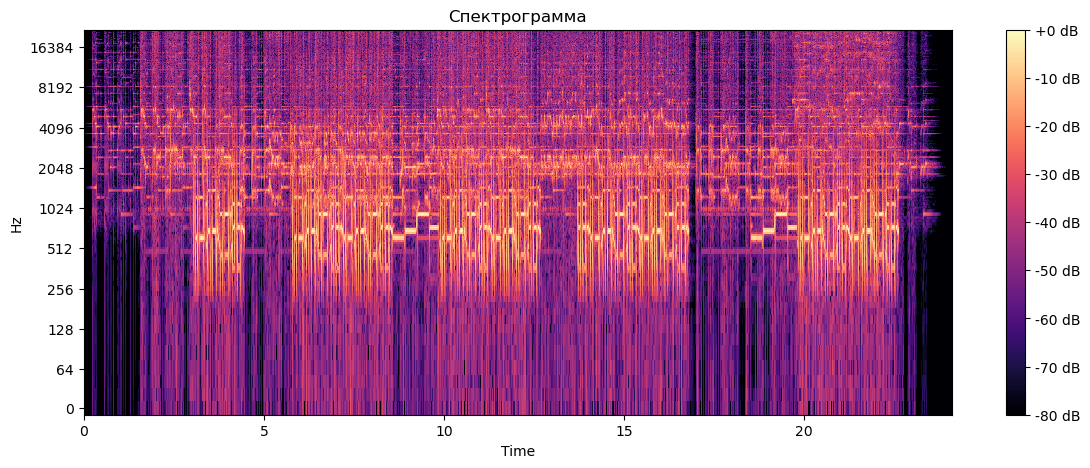

Processing files: 1it [01:59, 119.39s/it]

Расширение: .jpg
   Файл: C:\Users\Nekon\Pictures\MSI Wallpaper\closeup-shot-of-a-disabled-white-cat-on-white.jpg, Размер: 1435870 байт
Расширение: .mp3
   Файл: C:\Users\Nekon\Pictures\MSI Wallpaper\hammali-navai_-_a-esli-eto-lyubov.mp3, Размер: 9641317 байт


In [2]:
def create_adjacency_matrix(image):
    width, height = image.size
    adjacency_matrix = lil_matrix((width*height, width*height), dtype=np.uint8)

    for i in range(height):
        for j in range(width):
            if j < width - 1:
                adjacency_matrix[i*width+j, i*width+(j+1)] = 1
                adjacency_matrix[i*width+(j+1), i*width+j] = 1
            if i < height - 1:
                adjacency_matrix[i*width+j, (i+1)*width+j] = 1
                adjacency_matrix[(i+1)*width+j, i*width+j] = 1
    return adjacency_matrix

def process_image(filename):
    print(f"Обработка изображений: {filename}")
    img = Image.open(filename).convert('L')
    img_array = np.array(img)
    adjacency_matrix = create_adjacency_matrix(img)
    plt.spy(adjacency_matrix, markersize=0.1)
    plt.show()

def process_audio(filename):
    print(f"Обработка аудио: {filename}")
    data, sample_rate = librosa.load(filename, sr=None)

    # Берем каждый 10-й образец данных
    data = data[::10]
    
    fft_out = np.abs(librosa.stft(data))
    plt.figure(figsize=(14, 5))
    librosa.display.specshow(librosa.amplitude_to_db(fft_out, ref=np.max), sr=sample_rate, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Спектрограмма')
    plt.show()

def process_files(directory, size_limit):
    extensions = dict()
    for root, dirs, files in tqdm(os.walk(directory), desc="Processing files"):
        for file in files:
            filename = os.path.join(root, file)
            size = os.path.getsize(filename)
            if size > size_limit:
                ext = os.path.splitext(file)[1]
                if ext not in extensions:
                    extensions[ext] = []
                extensions[ext].append(filename)

                if fnmatch.fnmatch(file, "*.jpg") or fnmatch.fnmatch(file, "*.png"):
                    process_image(filename)
                elif fnmatch.fnmatch(file, "*.wav") or fnmatch.fnmatch(file, "*.mp3"):
                    process_audio(filename)

    for extension, files in extensions.items():
        print(f"Расширение: {extension}")
        for file in files:
            size = os.path.getsize(file)
            print(f"   Файл: {file}, Размер: {size} байт")

size_limit = 1000000
directory = r'C:\Users\Nekon\Pictures\MSI Wallpaper'
process_files(directory, size_limit)

# В "directory =" вам нужно указать полный путь, где будут находиться ваши файлы.

# Пояснения работы кода

- Функция `create_adjacency_matrix` принимает изображение в качестве входных данных и создает матрицу смежности на основе размеров изображения. Создается пустая разреженная матрица с помощью `scipy.sparse.lil_matrix`, а затем происходит перебор пикселей изображения для заполнения матрицы единицами для смежных пикселей.

- Функция `process_image` принимает имя файла в качестве входных данных, открывает изображение с помощью `PIL.Image`, преобразует его в оттенки серого с помощью `convert('L')`, а затем преобразует его в массив `NumPy`. Затем она вызывает функцию `create_adjacency_matrix` для получения матрицы смежности для изображения. Наконец, она строит матрицу смежности с помощью matplotlib.pyplot.spy и отображает график с помощью `plt.show()`.

- Функция `process_audio` принимает имя файла в качестве входных данных, загружает аудиофайл с помощью `librosa.load` и вычисляет преобразование Фурье для коротких интервалов времени (STFT) с помощью `librosa.stft`. Затем она строит спектрограмму аудио с помощью `librosa.display.specshow` и `matplotlib.pyplot`, а также отображает график.

- Функция `process_files` принимает каталог и ограничение на размер файла в качестве входных данных. Создается словарь `extensions`, который будет содержать информацию о расширениях файлов и связанных с ними файловых путях. Затем происходит обход файлов и каталогов в указанном каталоге с помощью `os.walk`. Для каждого файла выполняется проверка его размера и определение его расширения. Если размер файла превышает ограничение, файл добавляется в словарь `extensions` для соответствующего расширения. Если файл имеет расширение `".jpg"` или `".png"`, выполняется обработка изображения с помощью `process_image`. Если файл имеет расширение `".wav"` или `".mp3"`, выполняется обработка аудио с помощью `process_audio`. 

- По завершении обработки файлов выводится информация о расширениях и размерах файлов.